In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1Coo0Hdih-Zpph4lN5T-UqPIwk2Z3uvcR')
market = pd.read_csv('https://drive.google.com/uc?export=download&id=1q48VPCAxL-axBkVwhRgoV_thmAmWeB8W')

# Data Cleaning and Preparation

In [3]:
data['last_dte'] = pd.to_datetime(data.last_dte)
data['m_year'] = data['last_dte'].dt.strftime('%m/%Y')
data = data.sort_values(by='m_year')
data.head()

,Unnamed: 0,loan_id,orig_chn,seller,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,...,orig_dte,orig_val,prepay,rela_upb,seller_cate,servicer_cate,current_ltv_nsa,Unnamed: 25,last_dte,m_year
682,682,2.620000e+11,R,"JPMORGAN CHASE BANK, NA",7.875,202000,360,74,74,2,...,11/1/2000,272972.9730,1,0.673333,1,1,63.881260,NaN,2002-01-01,01/2002
249,249,1.620000e+11,C,AMTRUST BANK,8.375,105000,360,55,55,2,...,3/1/2000,190909.0909,1,0.598291,1,1,48.085794,NaN,2002-01-01,01/2002
7712,7712,7.450000e+11,C,OTHER,7.500,162000,360,90,90,2,...,7/1/2001,180000.0000,1,0.764151,0,2,88.647368,NaN,2002-01-01,01/2002
1415,1415,4.480000e+11,R,"WELLS FARGO BANK, N.A.",7.500,235000,353,67,67,2,...,11/1/1999,350746.2687,1,1.320225,1,1,57.081534,NaN,2002-01-01,01/2002
2876,2876,7.950000e+11,R,"FLAGSTAR BANK, FSB",8.375,102000,360,95,95,2,...,6/1/2000,107368.4210,1,0.886957,1,1,87.267380,NaN,2002-01-01,01/2002


In [4]:
market['date'] = pd.to_datetime(market.date)
market['m_date'] = market['date'].dt.strftime('%m/%Y')
market = market.sort_values(by='m_date')
market_year = market.groupby('m_date').mean().reset_index()
market_year.head()

,m_date,pmms30,pmms15,pmms15p,pmms51,pmms51p,pmms51m,pmms51spread
0,01/1972,7.4375,NaN,NaN,NaN,NaN,NaN,NaN
1,01/1973,7.4375,NaN,NaN,NaN,NaN,NaN,NaN
2,01/1974,8.5400,NaN,NaN,NaN,NaN,NaN,NaN
3,01/1975,9.4320,NaN,NaN,NaN,NaN,NaN,NaN
4,01/1976,9.0160,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
rate_30 = market_year[['m_date', 'pmms30']]
rate_30.head()

,m_date,pmms30
0,01/1972,7.4375
1,01/1973,7.4375
2,01/1974,8.5400
3,01/1975,9.4320
4,01/1976,9.0160


In [6]:
rate_15 = market_year[['m_date', 'pmms15']]
rate_15.head()

,m_date,pmms15
0,01/1972,NaN
1,01/1973,NaN
2,01/1974,NaN
3,01/1975,NaN
4,01/1976,NaN


In [7]:
mat_30 = data[data['orig_trm']==360]
mat_30 = mat_30.merge(rate_30, left_on='m_year', right_on = 'm_date')
mat_30.head()

,Unnamed: 0,loan_id,orig_chn,seller,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,...,prepay,rela_upb,seller_cate,servicer_cate,current_ltv_nsa,Unnamed: 25,last_dte,m_year,m_date,pmms30
0,682,2.620000e+11,R,"JPMORGAN CHASE BANK, NA",7.875,202000,360,74,74,2,...,1,0.673333,1,1,63.881260,NaN,2002-01-01,01/2002,01/2002,6.9975
1,249,1.620000e+11,C,AMTRUST BANK,8.375,105000,360,55,55,2,...,1,0.598291,1,1,48.085794,NaN,2002-01-01,01/2002,01/2002,6.9975
2,7712,7.450000e+11,C,OTHER,7.500,162000,360,90,90,2,...,1,0.764151,0,2,88.647368,NaN,2002-01-01,01/2002,01/2002,6.9975
3,2876,7.950000e+11,R,"FLAGSTAR BANK, FSB",8.375,102000,360,95,95,2,...,1,0.886957,1,1,87.267380,NaN,2002-01-01,01/2002,01/2002,6.9975
4,586,2.440000e+11,R,BISHOPS GATE RESIDENTIAL MORTGAGE TRUST,8.125,137000,360,76,76,1,...,1,0.595652,2,1,66.345221,NaN,2002-01-01,01/2002,01/2002,6.9975


In [8]:
mat_15 = data[data['orig_trm']<300]
mat_15 = mat_15.merge(rate_15, left_on='m_year', right_on = 'm_date')
mat_15.head()

,Unnamed: 0,loan_id,orig_chn,seller,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,...,prepay,rela_upb,seller_cate,servicer_cate,current_ltv_nsa,Unnamed: 25,last_dte,m_year,m_date,pmms15
0,3195,8.820000e+11,C,"CITIMORTGAGE, INC.",7.625,100000,180,42,42,2,...,1,0.365631,1,1,29.395502,NaN,2002-01-01,01/2002,01/2002,6.48
1,9032,9.680000e+11,R,BISHOPS GATE RESIDENTIAL MORTGAGE TRUST,6.625,80000,180,80,80,2,...,1,0.629921,2,2,76.646713,NaN,2002-01-01,01/2002,01/2002,6.48
2,1925,5.670000e+11,C,OTHER,7.990,96000,180,85,85,2,...,1,0.596273,0,0,78.732387,NaN,2002-01-01,01/2002,01/2002,6.48
3,2899,8.040000e+11,R,"CITIMORTGAGE, INC.",8.375,168000,240,63,63,2,...,1,0.714894,1,1,51.676060,NaN,2002-01-01,01/2002,01/2002,6.48
4,633,2.530000e+11,C,"CITIMORTGAGE, INC.",7.125,65000,180,50,50,2,...,1,0.382353,1,1,40.364813,NaN,2002-01-01,01/2002,01/2002,6.48


In [9]:
final_df = pd.concat([mat_30, mat_15])
final_df.head()

,Unnamed: 0,loan_id,orig_chn,seller,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,...,rela_upb,seller_cate,servicer_cate,current_ltv_nsa,Unnamed: 25,last_dte,m_year,m_date,pmms30,pmms15
0,682,2.620000e+11,R,"JPMORGAN CHASE BANK, NA",7.875,202000,360,74,74,2,...,0.673333,1,1,63.881260,NaN,2002-01-01,01/2002,01/2002,6.9975,NaN
1,249,1.620000e+11,C,AMTRUST BANK,8.375,105000,360,55,55,2,...,0.598291,1,1,48.085794,NaN,2002-01-01,01/2002,01/2002,6.9975,NaN
2,7712,7.450000e+11,C,OTHER,7.500,162000,360,90,90,2,...,0.764151,0,2,88.647368,NaN,2002-01-01,01/2002,01/2002,6.9975,NaN
3,2876,7.950000e+11,R,"FLAGSTAR BANK, FSB",8.375,102000,360,95,95,2,...,0.886957,1,1,87.267380,NaN,2002-01-01,01/2002,01/2002,6.9975,NaN
4,586,2.440000e+11,R,BISHOPS GATE RESIDENTIAL MORTGAGE TRUST,8.125,137000,360,76,76,1,...,0.595652,2,1,66.345221,NaN,2002-01-01,01/2002,01/2002,6.9975,NaN


In [10]:
final_df['market_rate'] = final_df['pmms30'].fillna(final_df['pmms15'])
final_df['Incent']= final_df['orig_rt']-final_df['market_rate']
final_df.head()

,Unnamed: 0,loan_id,orig_chn,seller,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,...,servicer_cate,current_ltv_nsa,Unnamed: 25,last_dte,m_year,m_date,pmms30,pmms15,market_rate,Incent
0,682,2.620000e+11,R,"JPMORGAN CHASE BANK, NA",7.875,202000,360,74,74,2,...,1,63.881260,NaN,2002-01-01,01/2002,01/2002,6.9975,NaN,6.9975,0.8775
1,249,1.620000e+11,C,AMTRUST BANK,8.375,105000,360,55,55,2,...,1,48.085794,NaN,2002-01-01,01/2002,01/2002,6.9975,NaN,6.9975,1.3775
2,7712,7.450000e+11,C,OTHER,7.500,162000,360,90,90,2,...,2,88.647368,NaN,2002-01-01,01/2002,01/2002,6.9975,NaN,6.9975,0.5025
3,2876,7.950000e+11,R,"FLAGSTAR BANK, FSB",8.375,102000,360,95,95,2,...,1,87.267380,NaN,2002-01-01,01/2002,01/2002,6.9975,NaN,6.9975,1.3775
4,586,2.440000e+11,R,BISHOPS GATE RESIDENTIAL MORTGAGE TRUST,8.125,137000,360,76,76,1,...,1,66.345221,NaN,2002-01-01,01/2002,01/2002,6.9975,NaN,6.9975,1.1275


In [11]:
final_df.columns

Index(['Unnamed: 0', 'loan_id', 'orig_chn', 'seller', 'orig_rt', 'orig_amt',
       'orig_trm', 'oltv', 'ocltv', 'num_bo', 'dti', 'cscore_b', 'fthb_flg',
       'purpose', 'prop_typ', 'num_unit', 'occ_stat', 'state', 'orig_dte',
       'orig_val', 'prepay', 'rela_upb', 'seller_cate', 'servicer_cate',
       'current_ltv_nsa', 'Unnamed: 25', 'last_dte', 'm_year', 'm_date',
       'pmms30', 'pmms15', 'market_rate', 'Incent'],
      dtype='object')

In [12]:
final_df = final_df.drop(columns=['Unnamed: 0','loan_id','state','orig_dte','Unnamed: 25','last_dte', 'm_date','pmms30', 'pmms15', 'seller'])
final_df.head()

,orig_chn,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,dti,cscore_b,fthb_flg,...,occ_stat,orig_val,prepay,rela_upb,seller_cate,servicer_cate,current_ltv_nsa,m_year,market_rate,Incent
0,R,7.875,202000,360,74,74,2,29,705,N,...,P,272972.9730,1,0.673333,1,1,63.881260,01/2002,6.9975,0.8775
1,C,8.375,105000,360,55,55,2,55,807,N,...,P,190909.0909,1,0.598291,1,1,48.085794,01/2002,6.9975,1.3775
2,C,7.500,162000,360,90,90,2,26,734,N,...,P,180000.0000,1,0.764151,0,2,88.647368,01/2002,6.9975,0.5025
3,R,8.375,102000,360,95,95,2,50,757,N,...,P,107368.4210,1,0.886957,1,1,87.267380,01/2002,6.9975,1.3775
4,R,8.125,137000,360,76,76,1,24,783,Y,...,P,180263.1579,1,0.595652,2,1,66.345221,01/2002,6.9975,1.1275


In [13]:
d = final_df[final_df['orig_rt']>final_df['market_rate']]
d.head()

,orig_chn,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,dti,cscore_b,fthb_flg,...,occ_stat,orig_val,prepay,rela_upb,seller_cate,servicer_cate,current_ltv_nsa,m_year,market_rate,Incent
0,R,7.875,202000,360,74,74,2,29,705,N,...,P,272972.9730,1,0.673333,1,1,63.881260,01/2002,6.9975,0.8775
1,C,8.375,105000,360,55,55,2,55,807,N,...,P,190909.0909,1,0.598291,1,1,48.085794,01/2002,6.9975,1.3775
2,C,7.500,162000,360,90,90,2,26,734,N,...,P,180000.0000,1,0.764151,0,2,88.647368,01/2002,6.9975,0.5025
3,R,8.375,102000,360,95,95,2,50,757,N,...,P,107368.4210,1,0.886957,1,1,87.267380,01/2002,6.9975,1.3775
4,R,8.125,137000,360,76,76,1,24,783,Y,...,P,180263.1579,1,0.595652,2,1,66.345221,01/2002,6.9975,1.1275


In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90628 entries, 0 to 25444
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   orig_chn         90628 non-null  object 
 1   orig_rt          90628 non-null  float64
 2   orig_amt         90628 non-null  int64  
 3   orig_trm         90628 non-null  int64  
 4   oltv             90628 non-null  int64  
 5   ocltv            90628 non-null  int64  
 6   num_bo           90628 non-null  int64  
 7   dti              90628 non-null  int64  
 8   cscore_b         90628 non-null  int64  
 9   fthb_flg         90628 non-null  object 
 10  purpose          90628 non-null  object 
 11  prop_typ         90628 non-null  object 
 12  num_unit         90628 non-null  int64  
 13  occ_stat         90628 non-null  object 
 14  orig_val         90628 non-null  float64
 15  prepay           90628 non-null  int64  
 16  rela_upb         90628 non-null  float64
 17  seller_cate 

In [15]:
cat = ['fthb_flg', 'purpose', 'prop_typ', 'occ_stat']
dummies = pd.get_dummies(final_df[cat], drop_first=True)
dummies.head()

,fthb_flg_U,fthb_flg_Y,purpose_P,purpose_R,purpose_U,prop_typ_CP,prop_typ_MH,prop_typ_PU,prop_typ_SF,occ_stat_P,occ_stat_S
0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,1,1,0
3,0,0,1,0,0,0,0,0,1,1,0
4,0,1,1,0,0,0,0,0,1,1,0


In [16]:
final_df = pd.concat([final_df, dummies], axis = 1)
final_df.head()

,orig_chn,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,dti,cscore_b,fthb_flg,...,fthb_flg_Y,purpose_P,purpose_R,purpose_U,prop_typ_CP,prop_typ_MH,prop_typ_PU,prop_typ_SF,occ_stat_P,occ_stat_S
0,R,7.875,202000,360,74,74,2,29,705,N,...,0,0,0,0,0,0,0,1,1,0
1,C,8.375,105000,360,55,55,2,55,807,N,...,0,1,0,0,0,0,0,1,1,0
2,C,7.500,162000,360,90,90,2,26,734,N,...,0,1,0,0,0,0,0,1,1,0
3,R,8.375,102000,360,95,95,2,50,757,N,...,0,1,0,0,0,0,0,1,1,0
4,R,8.125,137000,360,76,76,1,24,783,Y,...,1,1,0,0,0,0,0,1,1,0


In [17]:
final_df = final_df.drop(columns=['fthb_flg', 'purpose', 'prop_typ', 'occ_stat'])
final_df.head()

,orig_chn,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,dti,cscore_b,num_unit,...,fthb_flg_Y,purpose_P,purpose_R,purpose_U,prop_typ_CP,prop_typ_MH,prop_typ_PU,prop_typ_SF,occ_stat_P,occ_stat_S
0,R,7.875,202000,360,74,74,2,29,705,1,...,0,0,0,0,0,0,0,1,1,0
1,C,8.375,105000,360,55,55,2,55,807,1,...,0,1,0,0,0,0,0,1,1,0
2,C,7.500,162000,360,90,90,2,26,734,1,...,0,1,0,0,0,0,0,1,1,0
3,R,8.375,102000,360,95,95,2,50,757,1,...,0,1,0,0,0,0,0,1,1,0
4,R,8.125,137000,360,76,76,1,24,783,1,...,1,1,0,0,0,0,0,1,1,0


# Final Result

In [18]:

import pandas as pd # data processing
import numpy as np # working with arrays
import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations

from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization

from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss

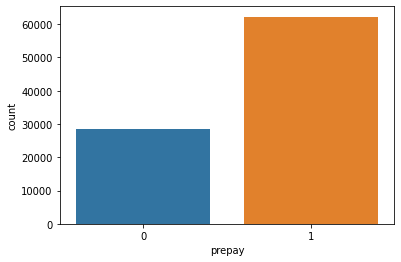

In [19]:
sns.countplot(data=final_df, x='prepay')

In [20]:
final_df.columns

Index(['orig_chn', 'orig_rt', 'orig_amt', 'orig_trm', 'oltv', 'ocltv',
       'num_bo', 'dti', 'cscore_b', 'num_unit', 'orig_val', 'prepay',
       'rela_upb', 'seller_cate', 'servicer_cate', 'current_ltv_nsa', 'm_year',
       'market_rate', 'Incent', 'fthb_flg_U', 'fthb_flg_Y', 'purpose_P',
       'purpose_R', 'purpose_U', 'prop_typ_CP', 'prop_typ_MH', 'prop_typ_PU',
       'prop_typ_SF', 'occ_stat_P', 'occ_stat_S'],
      dtype='object')

In [21]:
#final_var = ['oltv','num_bo','dti', 'cscore_b', 'num_unit', 'orig_val','Incent','occ_stat_P','purpose_P']
x_var = final_df.drop(columns =['orig_chn','prepay','m_year','orig_rt', 'market_rate'])
#x_var = final_df[final_var]
y_var = final_df['prepay']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.3, random_state = 45)

In [23]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2
X_test.head()

,orig_amt,orig_trm,oltv,ocltv,num_bo,dti,cscore_b,num_unit,orig_val,rela_upb,...,fthb_flg_Y,purpose_P,purpose_R,purpose_U,prop_typ_CP,prop_typ_MH,prop_typ_PU,prop_typ_SF,occ_stat_P,occ_stat_S
23285,-0.133081,-1.599684,-2.305614,-2.344345,0.821877,-1.102282,1.364425,-0.141442,1.380241,-0.624201,...,-0.346580,-0.761843,1.468443,-0.011912,-0.074269,-0.079957,-0.448630,0.593401,0.352741,-0.20879
16255,1.441655,0.611875,-0.405370,-0.461215,0.821877,0.006904,-0.163203,-0.141442,1.233643,1.337097,...,-0.346580,-0.761843,-0.680993,-0.011912,-0.074269,-0.079957,2.229009,-1.685201,0.352741,-0.20879
37139,0.609036,0.611875,0.228044,0.166495,0.821877,0.689479,0.296926,-0.141442,0.258680,0.977851,...,-0.346580,-0.761843,1.468443,-0.011912,-0.074269,-0.079957,2.229009,-1.685201,0.352741,-0.20879
47112,-0.639892,0.611875,0.573543,0.508882,0.821877,-0.505028,0.278521,-0.141442,-0.677369,0.174362,...,-0.346580,-0.761843,-0.680993,-0.011912,-0.074269,-0.079957,-0.448630,0.593401,0.352741,-0.20879
2335,-0.006378,0.611875,-1.153951,-1.203054,-1.155109,0.689479,0.370547,-0.141442,0.406410,-0.704281,...,2.885334,1.312607,-0.680993,-0.011912,-0.074269,-0.079957,2.229009,-1.685201,0.352741,-0.20879


In [24]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(lr_model, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
variables = X_train.columns[rfe.support_]
variables

[False  True  True  True  True  True  True False False  True  True  True
  True  True False False  True False False False False False False False
 False]
[ 4  1  1  1  1  1  1 14 10  1  1  1  1  1 13  3  1  5 11 12  6  8  9  2
  7]


Index(['orig_trm', 'oltv', 'ocltv', 'num_bo', 'dti', 'cscore_b', 'rela_upb',
       'seller_cate', 'servicer_cate', 'current_ltv_nsa', 'Incent',
       'purpose_P'],
      dtype='object')

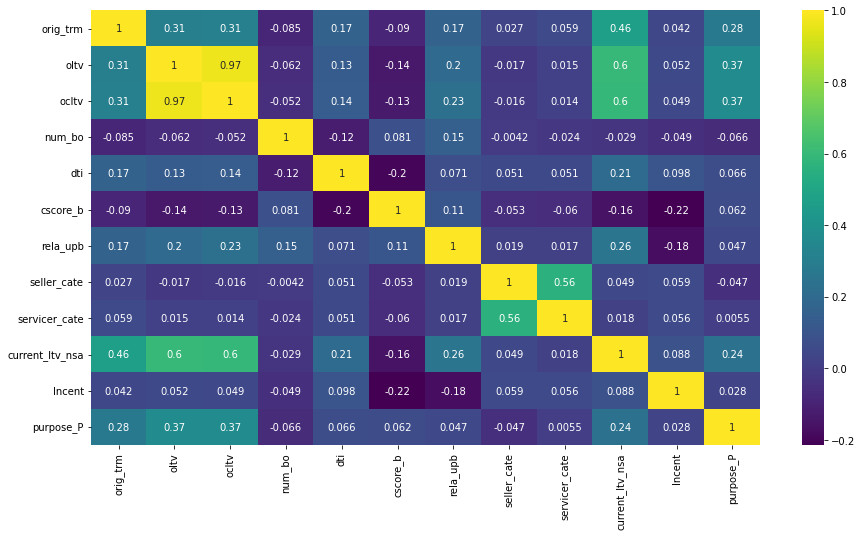

In [26]:
corr = final_df[variables]
plt.figure(figsize=(15,8))
sns.heatmap(data= corr.corr(), annot=True, cmap='viridis')

In [27]:
 from sklearn.metrics import accuracy_score
 from sklearn.metrics import precision_score
 from sklearn.metrics import recall_score
 from sklearn.metrics import f1_score

In [28]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression RFE,0.728971,0.746925,0.917405,0.823434


In [29]:
predicted_df = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
predicted_df.head()

,Actual value,Predicted value
23285,1,1
16255,0,0
37139,1,1
47112,1,1
2335,1,1


In [30]:
y_pred = classifier.predict(X_test[variables])
y_proba = classifier.predict_proba(X_test[variables])

In [31]:
probability_actual1 = (predicted_df['Actual value'][predicted_df['Actual value']==1].count()/predicted_df['Actual value'].count())
probability_pred1 = (predicted_df['Predicted value'][predicted_df['Predicted value']==1].count()/predicted_df['Actual value'].count())
print(probability_actual1)
print(probability_pred1)

0.6888815329728935
0.8461142373754091


In [32]:
pr = {'Actual Probability':  [probability_actual1],
        'Predicted Probability': [probability_pred1]}
pr_df = pd.DataFrame(pr)  
pr_df     

,Actual Probability,Predicted Probability
0,0.688882,0.846114


In [33]:
import math
coef = classifier.coef_
coef_var = []
coef_exp = []

for x in coef:
  for c in x:
    coef_var.append(c)
    exp = math.exp(c)
    coef_exp.append(exp)

coef = list(zip(variables, coef_var, coef_exp))
coef_df = pd.DataFrame(coef, columns=['Variables','Coefficients','Odds Ratio'])

inter = classifier.intercept_[0]
inter_exp = math.exp(inter)
const = 'Constant'

l = [const, inter, inter_exp]
coef_df.loc[len(coef_df)] = l
coef_df

,Variables,Coefficients,Odds Ratio
0,orig_trm,-0.333810,0.716190
1,oltv,-0.716341,0.488536
2,ocltv,0.118405,1.125699
3,num_bo,0.156038,1.168871
4,dti,-0.068517,0.933778
5,cscore_b,0.284653,1.329301
6,rela_upb,-0.155138,0.856297
7,seller_cate,0.203910,1.226187
8,servicer_cate,-0.185641,0.830572
9,current_ltv_nsa,1.095797,2.991565


              precision    recall  f1-score   support

           0       0.63      0.31      0.42      8459
           1       0.75      0.92      0.82     18730

    accuracy                           0.73     27189
   macro avg       0.69      0.61      0.62     27189
weighted avg       0.71      0.73      0.70     27189



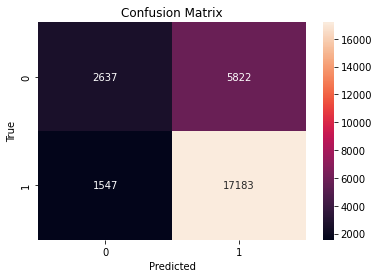

In [34]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

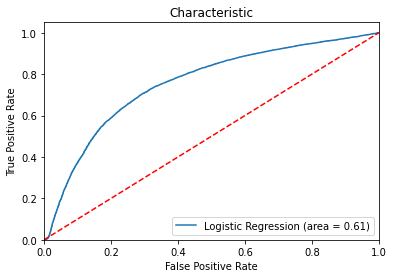

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#Trial Rounds

## 1st Statsmodel Trial

In [36]:
variables = ['orig_rt', 'orig_amt', 'orig_trm', 'oltv', 'ocltv',
       'num_bo', 'dti', 'cscore_b','num_unit', 'orig_val', 'rela_upb', 'seller_cate',
       'servicer_cate', 'current_ltv_nsa', 'Incent',
       'fthb_flg_U', 'fthb_flg_Y', 'purpose_P', 'purpose_R', 'purpose_U',
       'prop_typ_CP', 'prop_typ_MH', 'prop_typ_PU', 'prop_typ_SF',
       'occ_stat_P', 'occ_stat_S']

In [37]:
from statsmodels.formula.api import probit
from statsmodels.formula.api import logit
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import resample # for bootstrap
import scipy.stats # for confidence interval

In [38]:
eqn = 'prepay ~ orig_rt+ orig_amt+ orig_trm+ oltv+ ocltv+ num_bo+ dti+ cscore_b+ num_unit+ orig_val+ rela_upb+seller_cate+ servicer_cate+ current_ltv_nsa+ Incent+ fthb_flg_U+ fthb_flg_Y+ purpose_P+ purpose_R+ purpose_U+prop_typ_CP+ prop_typ_MH+ prop_typ_PU+ prop_typ_SF+ occ_stat_P+ occ_stat_S'
results = logit(eqn, final_df).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.492210
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 prepay   No. Observations:                90628
Model:                          Logit   Df Residuals:                    90601
Method:                           MLE   Df Model:                           26
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                  0.2081
Time:                        00:41:43   Log-Likelihood:                -44608.
converged:                       True   LL-Null:                       -56333.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.3462      0.180    -46.380      0.000      -8.699      -7.994
orig_rt       

In [39]:
final_df.columns[1:]

Index(['orig_rt', 'orig_amt', 'orig_trm', 'oltv', 'ocltv', 'num_bo', 'dti',
       'cscore_b', 'num_unit', 'orig_val', 'prepay', 'rela_upb', 'seller_cate',
       'servicer_cate', 'current_ltv_nsa', 'm_year', 'market_rate', 'Incent',
       'fthb_flg_U', 'fthb_flg_Y', 'purpose_P', 'purpose_R', 'purpose_U',
       'prop_typ_CP', 'prop_typ_MH', 'prop_typ_PU', 'prop_typ_SF',
       'occ_stat_P', 'occ_stat_S'],
      dtype='object')

In [40]:
final_df['prepay_predict'] = results.predict(final_df[variables])


In [41]:
final_df['prepay_predict'].head()

0    0.967460
1    0.985869
2    0.973900
3    0.979833
4    0.987891
Name: prepay_predict, dtype: float64

In [42]:
final_df['prepay_predict'].describe()

count    90628.000000
mean         0.686863
std          0.228120
min          0.025866
25%          0.519165
50%          0.732911
75%          0.888177
max          0.998017
Name: prepay_predict, dtype: float64

In [43]:
final_df.head()

,orig_chn,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,dti,cscore_b,num_unit,...,purpose_P,purpose_R,purpose_U,prop_typ_CP,prop_typ_MH,prop_typ_PU,prop_typ_SF,occ_stat_P,occ_stat_S,prepay_predict
0,R,7.875,202000,360,74,74,2,29,705,1,...,0,0,0,0,0,0,1,1,0,0.967460
1,C,8.375,105000,360,55,55,2,55,807,1,...,1,0,0,0,0,0,1,1,0,0.985869
2,C,7.500,162000,360,90,90,2,26,734,1,...,1,0,0,0,0,0,1,1,0,0.973900
3,R,8.375,102000,360,95,95,2,50,757,1,...,1,0,0,0,0,0,1,1,0,0.979833
4,R,8.125,137000,360,76,76,1,24,783,1,...,1,0,0,0,0,0,1,1,0,0.987891


In [44]:
df = final_df[['prepay','prepay_predict']]
df.head()

,prepay,prepay_predict
0,1,0.967460
1,1,0.985869
2,1,0.973900
3,1,0.979833
4,1,0.987891


In [45]:
import sklearn.metrics as sklm
import matplotlib.pyplot as plt

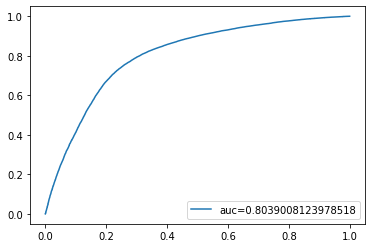

In [46]:
scores = final_df['prepay_predict']
#or scores = results.predict(data[exog_var])
y = final_df['prepay'].values

fpr, tpr, thresholds = sklm.roc_curve(y, scores)

auc = sklm.roc_auc_score(y, scores)

plt.plot(fpr, tpr, label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## 2nd SkLearn Trial

In [47]:
# Importing packages

import pandas as pd # data processing
import numpy as np # working with arrays
import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations

from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization

from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss

In [48]:
x_var = final_df[variables[1:]]
#y_var = final_df['prepay']
y_var = final_df['prepay']

In [49]:
x_var = StandardScaler().fit(x_var).transform(x_var)
x_var

array([[ 0.10527432,  0.61163723,  0.22568516, ...,  0.59422304,
         0.35527367, -0.20957333],
       [-0.77477212,  0.61163723, -0.8709033 , ...,  0.59422304,
         0.35527367, -0.20957333],
       [-0.25763143,  0.61163723,  1.14912807, ...,  0.59422304,
         0.35527367, -0.20957333],
       ...,
       [-0.03988798, -1.60211847, -0.35146666, ...,  0.59422304,
         0.35527367, -0.20957333],
       [-0.30299465, -0.8641999 ,  0.28340034, ..., -1.68286979,
        -2.8147315 , -0.20957333],
       [ 0.31394513, -1.60211847,  1.09141289, ...,  0.59422304,
         0.35527367, -0.20957333]])

In [50]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, random_state = 2)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = lr_model.predict(X_test)
#Predicted values
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
y_proba = lr_model.predict_proba(X_test)
y_proba

array([[0.41119732, 0.58880268],
       [0.1720623 , 0.8279377 ],
       [0.2529413 , 0.7470587 ],
       ...,
       [0.31477486, 0.68522514],
       [0.24120707, 0.75879293],
       [0.25943036, 0.74056964]])

In [53]:
l = []
for x in range(len(y_proba)):
  v = y_proba[x,1]
  l.append(v)

l[:10]

[0.5888026752294048,
 0.8279376999425196,
 0.7470586999992296,
 0.6879217821594683,
 0.48259685186958834,
 0.7896516459371518,
 0.5883998318143348,
 0.464450409515875,
 0.9269653969382945,
 0.8583905893927074]

In [54]:
arr = np.array(l)
arr.mean()

0.6846636817662344

In [55]:
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a

,Actual value,Predicted value
6437,0,1
45355,0,1
23916,1,1
33242,0,1
2999,1,0
...,...,...
2232,1,1
34197,1,1
20439,0,1
4347,1,1


In [56]:
a[a['Predicted value']==1].count()

Actual value       19053
Predicted value    19053
dtype: int64

              precision    recall  f1-score   support

           0       0.64      0.32      0.43      7136
           1       0.75      0.92      0.82     15521

    accuracy                           0.73     22657
   macro avg       0.70      0.62      0.63     22657
weighted avg       0.71      0.73      0.70     22657



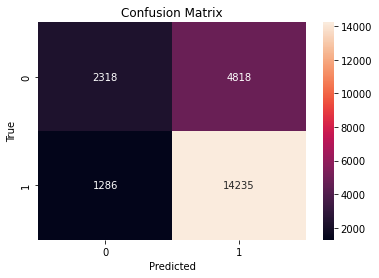

In [57]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

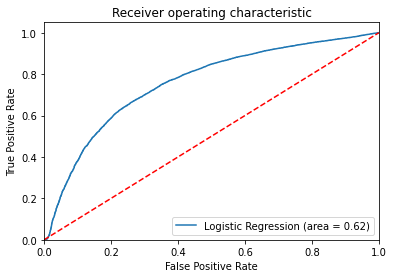

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [59]:
lr_model.score(X_test,y_test)

0.7305909873328331

In [60]:
c = final_df['prepay'][final_df['prepay']==1].count()

In [61]:
final_df['prepay'][final_df['prepay']==0].count()

28379

In [62]:
b = final_df['prepay'].count()

In [63]:
c/b

0.6868627797148784

In [64]:
#y_proba = logreg.predict_proba(X_test)
#y_proba

In [65]:
import math
coef = lr_model.coef_
coef_var = []
coef_exp = []

for x in coef:
  for c in x:
    coef_var.append(c)
    exp = math.exp(c)
    coef_exp.append(exp)

In [66]:
coef =list(zip(variables[1:], coef_var, coef_exp))

In [67]:
coef_df = pd.DataFrame(coef, columns=['Variables','Coefficients','Odds Ratio'])
coef_df

,Variables,Coefficients,Odds Ratio
0,orig_amt,0.043915,1.044893
1,orig_trm,-0.348716,0.705593
2,oltv,-0.681606,0.505804
3,ocltv,0.094781,1.099419
4,num_bo,0.149008,1.160682
5,dti,-0.076593,0.926267
6,cscore_b,0.270592,1.310740
7,num_unit,-0.001919,0.998083
8,orig_val,0.002458,1.002461
9,rela_upb,-0.205315,0.814391


In [68]:
coef_df['Percentage in Odds Prepayment'] = coef_df['Odds Ratio']-1

In [69]:
coef_df

,Variables,Coefficients,Odds Ratio,Percentage in Odds Prepayment
0,orig_amt,0.043915,1.044893,0.044893
1,orig_trm,-0.348716,0.705593,-0.294407
2,oltv,-0.681606,0.505804,-0.494196
3,ocltv,0.094781,1.099419,0.099419
4,num_bo,0.149008,1.160682,0.160682
5,dti,-0.076593,0.926267,-0.073733
6,cscore_b,0.270592,1.310740,0.310740
7,num_unit,-0.001919,0.998083,-0.001917
8,orig_val,0.002458,1.002461,0.002461
9,rela_upb,-0.205315,0.814391,-0.185609


## Statsmodel and SkLearn Regression Trial

##Statsmodel Regression Trial

In [70]:
from statsmodels.formula.api import probit
from statsmodels.formula.api import logit
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import resample # for bootstrap
import scipy.stats # for confidence interval
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
# Importing packages

import pandas as pd # data processing
import numpy as np # working with arrays
import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations

from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization

from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss

In [71]:
prob_prepay1 = (final_df['prepay'][final_df['prepay']==1].count()/final_df['prepay'].count())
prob_prepay1

0.6868627797148784

In [72]:
variables

['orig_rt',
 'orig_amt',
 'orig_trm',
 'oltv',
 'ocltv',
 'num_bo',
 'dti',
 'cscore_b',
 'num_unit',
 'orig_val',
 'rela_upb',
 'seller_cate',
 'servicer_cate',
 'current_ltv_nsa',
 'Incent',
 'fthb_flg_U',
 'fthb_flg_Y',
 'purpose_P',
 'purpose_R',
 'purpose_U',
 'prop_typ_CP',
 'prop_typ_MH',
 'prop_typ_PU',
 'prop_typ_SF',
 'occ_stat_P',
 'occ_stat_S']

In [73]:
formula = 'prepay~ +orig_amt+orig_trm+ oltv+ocltv+ num_bo+ dti+cscore_b+ seller_cate+ servicer_cate+ current_ltv_nsa+Incent'

In [74]:
results = logit(formula, final_df).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.546928
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 prepay   No. Observations:                90628
Model:                          Logit   Df Residuals:                    90616
Method:                           MLE   Df Model:                           11
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                  0.1201
Time:                        00:41:50   Log-Likelihood:                -49567.
converged:                       True   LL-Null:                       -56333.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.4118      0.129    -10.953      0.000      -1.664      -1.159
orig_amt      

In [75]:
vari = [ 'orig_amt', 'orig_trm', 'oltv', 'ocltv', 'num_bo', 'dti',
       'cscore_b', 'seller_cate', 'servicer_cate', 'current_ltv_nsa',
       'Incent']

In [76]:
final_df['prepay_predict'] = results.predict(final_df[vari])

In [77]:
df = final_df[['prepay','prepay_predict']]
df.head()

,prepay,prepay_predict
0,1,0.742830
1,1,0.790622
2,1,0.790942
3,1,0.812983
4,1,0.828179


In [78]:
df['prepay_predict'].describe()

count    90628.000000
mean         0.686863
std          0.177900
min          0.020570
25%          0.588063
50%          0.727077
75%          0.822147
max          0.998925
Name: prepay_predict, dtype: float64

In [79]:
df.loc[df['prepay']==1, 'prepay_predict'].describe()

count    62249.000000
mean         0.734440
std          0.153052
min          0.037571
25%          0.666125
50%          0.771397
75%          0.842830
max          0.998705
Name: prepay_predict, dtype: float64

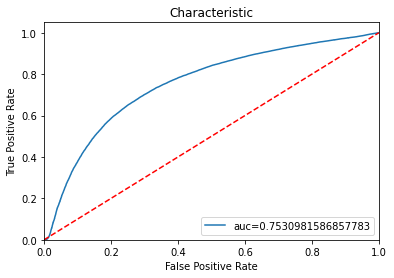

In [80]:
scores = final_df['prepay_predict']
#or scores = results.predict(data[exog_var])
y = final_df['prepay'].values

fpr, tpr, thresholds = sklm.roc_curve(y, scores)

auc = sklm.roc_auc_score(y, scores)

plt.plot(fpr, tpr, label="auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [81]:
# marginal effect

results.get_margeff(at='mean', method='dydx', atexog='Incent', dummy=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                 prepay
Method:                          dydx
At:                              mean
===================================================================================
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
orig_amt          -2.2e-07   1.55e-08    -14.158      0.000    -2.5e-07    -1.9e-07
orig_trm           -0.0008   2.34e-05    -34.878      0.000      -0.001      -0.001
oltv               -0.0079      0.000    -19.895      0.000      -0.009      -0.007
ocltv               0.0009      0.000      2.299      0.022       0.000       0.002
num_bo              0.0583      0.003     18.307      0.000       0.052       0.064
dti                -0.0014      0.000     -9.666      0.000      -0.002      -0.001
cscore_b            0.0011   3.04e-05     34.988      0.000       0.001       0.001
seller_cate         0.0651      0.003     21.940      0.000       0.059       0.071
servicer_cate      -0.0569      0.003    -19.719      0.000      -0.063      -0.051
current_ltv_nsa     0.0090   9.84e-05     91.643      0.000       0.009       0.009
Incent             -0.0579      0.002    -33.048      0.000      -0.061      -0.054
===================================================================================
"""

## Sklearn Regression Trial

In [82]:
final_df.columns

Index(['orig_chn', 'orig_rt', 'orig_amt', 'orig_trm', 'oltv', 'ocltv',
       'num_bo', 'dti', 'cscore_b', 'num_unit', 'orig_val', 'prepay',
       'rela_upb', 'seller_cate', 'servicer_cate', 'current_ltv_nsa', 'm_year',
       'market_rate', 'Incent', 'fthb_flg_U', 'fthb_flg_Y', 'purpose_P',
       'purpose_R', 'purpose_U', 'prop_typ_CP', 'prop_typ_MH', 'prop_typ_PU',
       'prop_typ_SF', 'occ_stat_P', 'occ_stat_S', 'prepay_predict'],
      dtype='object')

In [83]:
final_var = ['orig_amt','orig_trm','orig_val','seller_cate',
       'servicer_cate','oltv','num_bo','dti', 'cscore_b', 'num_unit', 'orig_val','Incent','occ_stat_P','purpose_P']

In [84]:
x_var = final_df[final_var]
#y_var = final_df['prepay']
y_var = final_df['prepay']

In [85]:
x_var = StandardScaler().fit(x_var).transform(x_var)

In [86]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.3, random_state = 2)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [87]:
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)

In [88]:
predicted_df = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
predicted_df.head()

,Actual value,Predicted value
6437,0,1
45355,0,1
23916,1,1
33242,0,1
2999,1,1


In [89]:
probability_actual1 = (predicted_df['Actual value'][predicted_df['Actual value']==1].count()/predicted_df['Actual value'].count())
probability_pred1 = (predicted_df['Predicted value'][predicted_df['Predicted value']==1].count()/predicted_df['Actual value'].count())
print(probability_actual1)
print(probability_pred1)

0.6845415425355842
0.9499429916510354


              precision    recall  f1-score   support

           0       0.65      0.10      0.18      8577
           1       0.70      0.97      0.82     18612

    accuracy                           0.70     27189
   macro avg       0.67      0.54      0.50     27189
weighted avg       0.68      0.70      0.61     27189



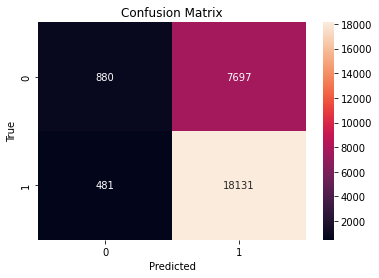

In [90]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

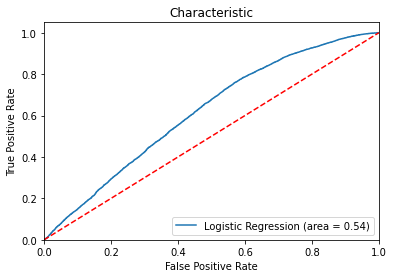

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [92]:
import math
coef = lr_model.coef_
coef_var = []
coef_exp = []

for x in coef:
  for c in x:
    coef_var.append(c)
    exp = math.exp(c)
    coef_exp.append(exp)

coef = list(zip(final_var, coef_var, coef_exp))
coef_df = pd.DataFrame(coef, columns=['Variables','Coefficients','Odds Ratio'])

inter = lr_model.intercept_[0]
inter_exp = math.exp(inter)
const = 'Constant'

l = [const, inter, inter_exp]
coef_df.loc[len(coef_df)] = l
coef_df

,Variables,Coefficients,Odds Ratio
0,orig_amt,-0.001458,0.998543
1,orig_trm,-0.006065,0.993953
2,orig_val,-0.004482,0.995528
3,seller_cate,0.258028,1.294375
4,servicer_cate,-0.229908,0.794606
5,oltv,-0.102400,0.902669
6,num_bo,0.155810,1.168604
7,dti,-0.002402,0.997601
8,cscore_b,0.191880,1.211525
9,num_unit,-0.020288,0.979916


For incentive -0.22, it is less likely for a prepayment to occur as odds ratio is below < 1



In [93]:
final_df['Incent'][final_df['Incent']>0].count()

80707